In [1]:
import numpy as np
from astropy.table import Table
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
planck_scaling_factor = Table.read('unblinded_planck_scaling_factor_20200817.dat', format='ascii')
bolocam_scaling_factor = Table.read('unblinded_bolocam_scaling_factor_20200817.dat', format='ascii')
planck_scaling_factor_jk = Table.read('unblinded_planck_scaling_factor_jk_20200817.dat', format='ascii')
bolocam_scaling_factor_jk = Table.read('unblinded_bolocam_scaling_factor_jk_20200817.dat', format='ascii')
a478_noise = Table.read('A0478_adjust_noise_final.dat', format='ascii')

planck_names = ['A2029','A0478','PKS0745','R1542']
bolocam_names = ['A2204','M2129','A1835','M2140','M1931','M1115','M1532','M1720','M0429','M1347','M1423']

In [3]:
#scatter = np.random.normal(0, 0.04, 1000)
#t = Table()
#t['A0478'] = scatter
#t.write('A0478_adjust_noise_final.dat', format='ascii', overwrite=True)

In [4]:
for i in range(0, 3):
    planck_scaling_factor[planck_names[i]] = np.log(planck_scaling_factor[planck_names[i]])
    planck_scaling_factor_jk[planck_names[i]] = np.log(planck_scaling_factor_jk[planck_names[i]])
    
for i in range(0, len(bolocam_scaling_factor.columns)):
    bolocam_scaling_factor[bolocam_names[i]] = np.log(bolocam_scaling_factor[bolocam_names[i]])
    bolocam_scaling_factor_jk[bolocam_names[i]] = np.log(bolocam_scaling_factor_jk[bolocam_names[i]])

In [5]:
planck_scaling_factor_jk['A0478'] = planck_scaling_factor_jk['A0478'] + a478_noise['A0478']

In [6]:
planck_fit_data = []
bolocam_fit_data = []
nct_params = []

for i in range(0, 3):
    planck_fit_data.append(planck_scaling_factor_jk[planck_names[i]] - 
                           np.median(planck_scaling_factor_jk[planck_names[i]]))
    
for i in range(0, 11):
    bolocam_fit_data.append(bolocam_scaling_factor_jk[bolocam_names[i]] - 
                           np.median(bolocam_scaling_factor_jk[bolocam_names[i]]))

In [7]:
planck_skew = []
for i in range(0, 3):
    planck_skew.append(stats.skew(planck_fit_data[i]))
    
bolocam_skew = []
for i in range(0, 11):
    bolocam_skew.append(stats.skew(bolocam_fit_data[i]))

### Planck clusters

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5338: RuntimeWarning: invalid value encountered in multiply
  Px *= trm1+trm2
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5335: RuntimeWarning: overflow encountered in multiply
  trm1 /= np.asarray(fac1*sc.gamma((n+1)/2))
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1682: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5337: RuntimeWarning: overflow encountered in multiply
  trm2 /= np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1))


[339.96969188490175, 0.06616263479796017, -0.004447447060926816, 0.05369804346441508]


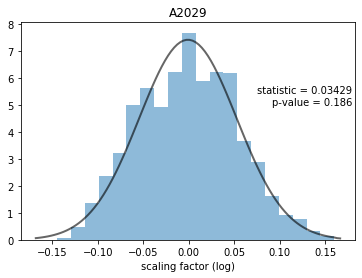

[339.9677300959767, 0.15583229112323133, -0.005993106836419702, 0.06599045881109597]


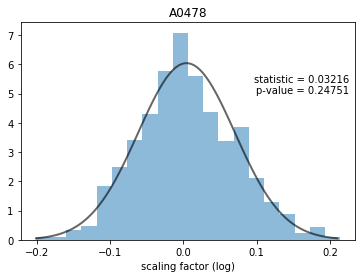

[16.79428117457301, -3.8729871269617533, 0.22761622082219968, 0.05923606466843334]


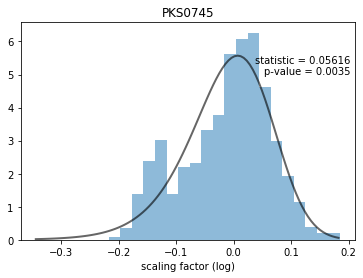

In [8]:
for i in range(0, 3):
    if i == 2 :
        df, nc, loc, scale = stats.nct.fit(planck_fit_data[i], fnc = planck_skew[i]*10)
    else:
        df, nc, loc, scale = stats.nct.fit(planck_fit_data[i], fnc = planck_skew[i])
    print([df, nc, loc, scale])
    nct_params.append([df, nc, loc, scale])
    x = np.linspace(stats.nct.ppf(0.001, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.999, df, nc, loc=loc, scale=scale), 100)
    plt.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    plt.hist(planck_fit_data[i], bins=20, density=True, alpha=0.5)
    plt.title(planck_names[i])
    plt.xlabel('scaling factor (log)')
    statistic, pval = stats.kstest(planck_fit_data[i], 'nct', [df, nc, loc, scale])
    plt.text(np.mean(x) + 1.85*np.std(x), 5, s='statistic = ' + str(round(statistic,5)) + '\np-value = ' + str(round(pval,5)), horizontalalignment='right')
    plt.savefig('1000_noise/' + planck_names[i] + '_1000_noise.jpg')
    plt.show()

### Bolocam clusters

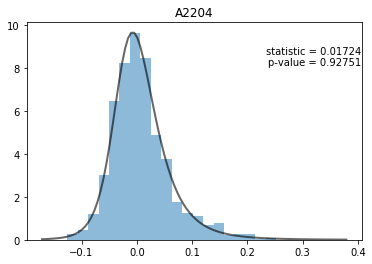

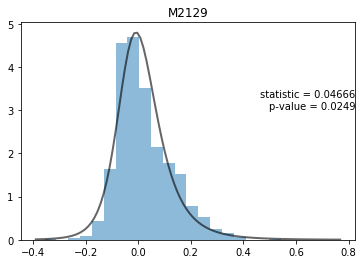

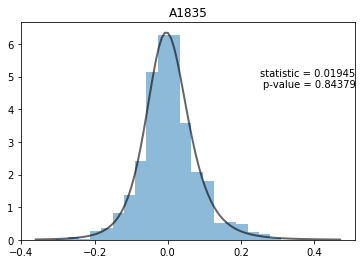

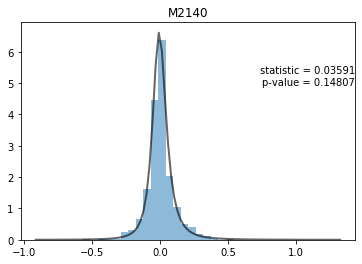

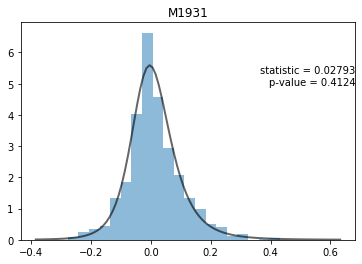

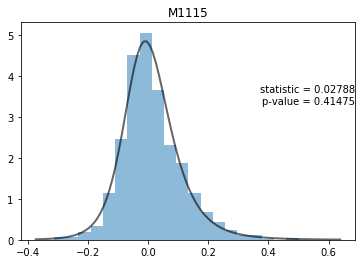

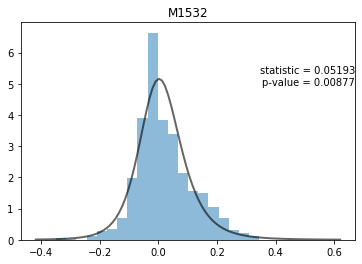

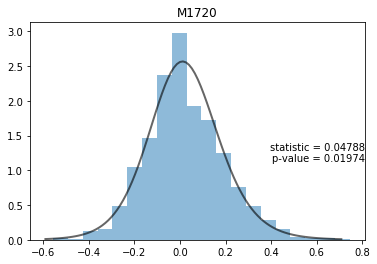

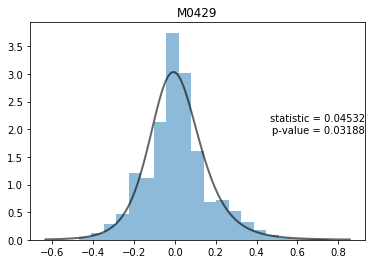

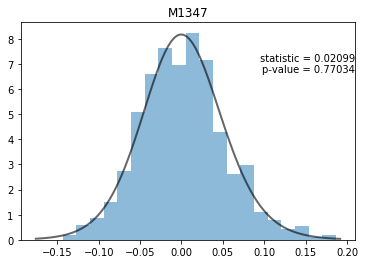

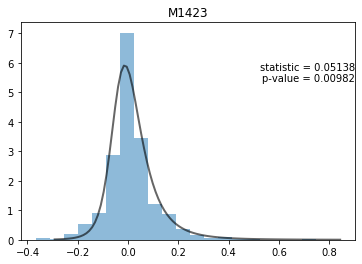

In [9]:
for i in range(0, 11):
    df, nc, loc, scale = stats.nct.fit(bolocam_fit_data[i], fnc = bolocam_skew[i])
    nct_params.append([df, nc, loc, scale])
    x = np.linspace(stats.nct.ppf(0.001, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.999, df, nc, loc=loc, scale=scale), 100)
    fig, ax = plt.subplots()
    ax.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    ax.hist(bolocam_fit_data[i], bins=20, density=True, alpha=0.5)
    ax.set_xlim()
    plt.title(bolocam_names[i])
    statistic, pval = stats.kstest(bolocam_fit_data[i], 'nct', [df, nc, loc, scale])
    plt.text(ax.get_xlim()[1], ax.get_ylim()[1] - 2, s='statistic = ' + str(round(statistic,5)) + '\np-value = ' + str(round(pval,5)), horizontalalignment='right')
    plt.savefig('1000_noise/' + bolocam_names[i] + '_commonly_blinded.jpg')
    plt.show()

In [10]:
nct_params

[[339.96969188490175,
  0.06616263479796017,
  -0.004447447060926816,
  0.05369804346441508],
 [339.9677300959767,
  0.15583229112323133,
  -0.005993106836419702,
  0.06599045881109597],
 [16.79428117457301,
  -3.8729871269617533,
  0.22761622082219968,
  0.05923606466843334],
 [4.162643626728423,
  1.05631824365792,
  -0.041019585895911426,
  0.03699880262442781],
 [3.9406191805440303,
  0.824600437697138,
  -0.06166626276133451,
  0.075578987069924],
 [4.085627830860457,
  0.3377373904027432,
  -0.020805592774094942,
  0.058726853399541826],
 [2.0609861668126666,
  0.2556688801840838,
  -0.01568437246026323,
  0.0532992327086082],
 [3.819961983632313,
  0.573981234239659,
  -0.03568131032022755,
  0.06581754797457146],
 [4.484328415003851,
  0.7484325510501272,
  -0.05796515922808439,
  0.07572880436138119],
 [4.04245236078791,
  0.44953635537942555,
  -0.025199309223284998,
  0.07203314424861632],
 [9.036739173082566,
  0.3645667158145911,
  -0.03949959286238942,
  0.150615496937156